# An example of fitting the synthetic nascent signal data

In [1]:
using CSV, DataFrames
using Plots; theme(:vibrant)
using RNAInferenceTool, StatsBase

## Import data and load SSA functions

In [2]:
# Import SSA code install delay SSA package at https://github.com/palmtree2013/DelaySSAToolkit.jl
include("delaytelegraphSSA.jl")
# Parameters 
τ = 0.5
tf = 20 
params = [1.0526,8.2034,57.989,0,0,τ,tf] # σ_off, σ_on, ρ_on, ρ_off, d, τ, SSA final time
L1 = 862; L = 3062; # L1 =  signal fluorescence 862 bp; L = total gene 3062 bp 

3062

## Generate synthetic SSA signal data

In [3]:
numofRun = 10000 # delay SSA sample size
djprob = construct_prob_delaytelegraph(params)
ens_prob = EnsembleProblem(djprob)
ens = solve(ens_prob, SSAStepper(), EnsembleSerial(), trajectories = numofRun);

## Check the distribution

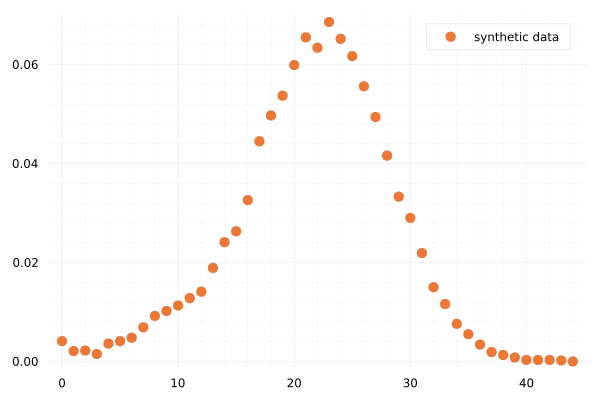

In [4]:
filter_pos_tf = [ens[i].channel[end][1] for i in eachindex(ens)]
res_ens = [signal_function.(filter_pos_tf[i], τ = τ, L1 = L1, L = L) for i in eachindex(filter_pos_tf)]
histo_synthetic = sum_with_non.(res_ens)
scatter(convert_histo(histo_synthetic), labels="synthetic data") # plot distribution

 # Inference

## load functions and set parameters

In [5]:
#For delay model the parameter order: σ_off, σ_on, ρ_on, ρ_off, d, τ
SRange = [(0.0,50.0),(0.0,50.0),(0.0,100.0),(0.0,0.0),(0.0,0.0),(τ,τ)];

#For telegraph model the parameter order: σ_off, σ_on, ρ_on, ρ_off, d
SRange_tele = [(0.0,50.0),(0.0,50.0),(0.0,100.0),(0.0,0.0),(1/τ,1/τ)];

Next, we set the data structure for optimization `OptimStruct`, which consists of the following elements:
1. data: default type is histogram data; the other supported type is to use probability distribution directly.
2. stage: `G1` or `G2`; where `G2` type data is inferred by setting G2 = G1*G1 (convolution).
3. dist: the distance function: Likelihood, Likelihood_fusion, Likelihood_rejection and other distance functions in Distances.jl package are supported.
4. model: telegraph model, delay telegraph model, and Poisson model are supported.
   
Keywords arguments:
1. infer_counts: Bool variable, `true` if the inferred histogram data is the number of count of the product (mature or bound Pol II), `false` if the histogram data is the normalized signal intensity.
2. L1, L2: if infer_counts is set `false` then L1 and L2 must be provided which represents the indices of the trapezoid signal function.

In [6]:
infer_struct = OptimStruct(histo_synthetic, G1(), Likelihood(), Delay(); infer_counts = false, L1 = 862, L2 =2200)
infer_struct_tele = OptimStruct(histo_synthetic, G1(), Likelihood(), Telegraph(); infer_counts = false, L1 = 862, L2 =2200)

OptimStruct{G1, Likelihood, Telegraph, Int64}([19.265846275022874, 22.47573361819824, 17.668965194846344, 26.150306399286492, 12.021965562433337, 21.164942481615967, 11.9891665902995, 4.0479179605000715, 11.0, 30.949192626223724  …  34.452822246993335, 23.225213829787677, 29.2193401640925, 31.882689348838575, 20.42947502158775, 20.057799672529924, 30.860088578555846, 20.603533064954796, 15.869429394539392, 13.66855911256687], G1(), Likelihood(), Telegraph(), true, false, 862, 2200)

In [7]:
estimated_params, distributions = optim_function(SRange, infer_struct, MaxFuncEvals = 10000)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.51 secs, 77 evals, 42 steps

, improv/step: 0.500 (last = 0.5000), fitness=33456.782660631


1.01 secs, 161 evals, 100 steps, improv/step: 0.430 (last = 0.3793), fitness=33239.694989228
1.51 secs, 277 evals, 191 steps

, improv/step: 0.393 (last = 0.3516), fitness=33239.694989228


2.01 secs, 410 evals, 320 steps, improv/step: 0.341 (last = 0.2636), fitness=33205.881549022
2.52 secs, 543 evals, 458 steps

, improv/step: 0.293 (last = 0.1812), fitness=33062.143909301


3.02 secs, 687 evals, 617 steps, improv/step: 0.254 (last = 0.1447), fitness=33062.143909301
3.52 secs, 818 evals, 768 steps

, improv/step: 0.237 (last = 0.1656), fitness=33011.925318569


4.02 secs, 959 evals, 934 steps, improv/step: 0.223 (last = 0.1566), fitness=33011.925318569
4.52 secs, 1097 evals, 1088 steps

, improv/step: 0.216 (last = 0.1753), fitness=32793.768167760


5.02 secs, 1253 evals, 1261 steps, improv/step: 0.209 (last = 0.1676), fitness=32793.768167760
5.53 secs, 1406 evals, 1439 steps

, improv/step: 0.201 (last = 0.1404), fitness=32773.930576067


6.03 secs, 1548 evals, 1592 steps, improv/step: 0.207 (last = 0.2680), fitness=32717.511819206
6.53 secs, 1703 evals, 1765 steps

, improv/step: 0.203 (last = 0.1618), fitness=32717.511819206


7.03 secs, 1854 evals, 1941 steps, improv/step: 0.199 (last = 0.1648), fitness=32708.435577238
7.53 secs, 2007 evals, 2122 steps

, improv/step: 0.197 (last = 0.1657), fitness=32696.791263373


8.03 secs, 2156 evals, 2289 steps, improv/step: 0.194 (last = 0.1617), fitness=32687.162180543
8.54 secs, 2310 evals, 2470 steps

, improv/step: 0.195 (last = 0.2044), fitness=32687.162180543


9.04 secs, 2467 evals, 2652 steps, improv/step: 0.196 (last = 0.2088), fitness=32682.717555179
9.54 secs, 2618 evals, 2828 steps

, improv/step: 0.193 (last = 0.1534), fitness=32680.801673540


10.06 secs, 2759 evals, 2999 steps, improv/step: 0.191 (last = 0.1637), fitness=32680.665210617
10.56 secs, 2896 evals, 3153 steps

, improv/step: 0.190 (last = 0.1688), fitness=32679.335663943


11.06 secs, 3052 evals, 3332 steps, improv/step: 0.189 (last = 0.1676), fitness=32678.918596582
11.56 secs, 3203 evals, 3500 steps

, improv/step: 0.190 (last = 0.2024), fitness=32678.430798188


12.06 secs, 3361 evals, 3678 steps, improv/step: 0.192 (last = 0.2472), fitness=32678.262473214
12.57 secs, 3521 evals, 3867 steps

, improv/step: 0.193 (last = 0.1958), fitness=32678.262473214


13.07 secs, 3638 evals, 3998 steps, improv/step: 0.193 (last = 0.2137), fitness=32678.251249546
13.57 secs, 3752 evals, 4122 steps

, improv/step: 0.194 (last = 0.2177), fitness=32678.246736636


14.07 secs, 3887 evals, 4271 steps, improv/step: 0.195 (last = 0.2215), fitness=32678.225389269
14.57 secs, 4030 evals, 4429 steps

, improv/step: 0.198 (last = 0.2785), fitness=32678.225389269


15.07 secs, 4192 evals, 4617 steps, improv/step: 0.199 (last = 0.2181), fitness=32678.219504401
15.57 secs, 4338 evals, 4783 steps

, improv/step: 0.200 (last = 0.2229), fitness=32678.219504401


16.08 secs, 4491 evals, 4959 steps, improv/step: 0.198 (last = 0.1534), fitness=32678.219504401
16.58 secs, 4646 evals, 5132 steps

, improv/step: 0.198 (last = 0.1850), fitness=32678.219504401


17.08 secs, 4797 evals, 5306 steps, improv/step: 0.198 (last = 0.2069), fitness=32678.219504401
17.58 secs, 4926 evals, 5450 steps

, improv/step: 0.197 (last = 0.1458), fitness=32678.219504401


18.08 secs, 5072 evals, 5609 steps, improv/step: 0.197 (last = 0.2264), fitness=32678.219424425
18.58 secs, 5222 evals, 5779 steps

, improv/step: 0.198 (last = 0.2176), fitness=32678.219347179


19.08 secs, 5368 evals, 5954 steps, improv/step: 0.198 (last = 0.1943), fitness=32678.219322760
19.58 secs, 5525 evals, 6132 steps

, improv/step: 0.199 (last = 0.2416), fitness=32678.219303715


20.09 secs, 5664 evals, 6278 steps, improv/step: 0.199 (last = 0.1781), fitness=32678.219303715
20.59 secs, 5811 evals, 6445 steps

, improv/step: 0.198 (last = 0.1916), fitness=32678.219301034


21.09 secs, 5958 evals, 6610 steps, improv/step: 0.199 (last = 0.2242), fitness=32678.219301034
21.59 secs, 6100 evals, 6768 steps

, improv/step: 0.200 (last = 0.2278), fitness=32678.219301034


22.09 secs, 6247 evals, 6938 steps, improv/step: 0.200 (last = 0.2176), fitness=32678.219300815
22.60 secs, 6388 evals, 7098 steps

, improv/step: 0.200 (last = 0.1938), fitness=32678.219300815


23.10 secs, 6531 evals, 7257 steps, improv/step: 0.200 (last = 0.2075), fitness=32678.219300770
23.60 secs, 6662 evals, 7408 steps

, improv/step: 0.199 (last = 0.1523), fitness=32678.219300770


24.10 secs, 6819 evals, 7597 steps, improv/step: 0.198 (last = 0.1587), fitness=32678.219300758
24.60 secs, 6978 evals, 7785 steps

, improv/step: 0.199 (last = 0.2340), fitness=32678.219300739


25.10 secs, 7129 evals, 7947 steps, improv/step: 0.200 (last = 0.2284), fitness=32678.219300720
25.61 secs, 7270 evals, 8107 steps

, improv/step: 0.201 (last = 0.2500), fitness=32678.219300713


26.11 secs, 7413 evals, 8266 steps, improv/step: 0.202 (last = 0.2516), fitness=32678.219300713
26.62 secs, 7550 evals, 8430 steps

, improv/step: 0.202 (last = 0.2073), fitness=32678.219300712


27.12 secs, 7654 evals, 8548 steps, improv/step: 0.201 (last = 0.1441), fitness=32678.219300712
27.63 secs, 7812 evals, 8724 steps

, improv/step: 0.202 (last = 0.2443), fitness=32678.219300712


28.13 secs, 7964 evals, 8892 steps, improv/step: 0.202 (last = 0.2321), fitness=32678.219300712
28.63 secs, 8122 evals, 9068 steps

, improv/step: 0.202 (last = 0.1761), fitness=32678.219300712


29.13 secs, 8276 evals, 9239 steps, improv/step: 0.203 (last = 0.2456), fitness=32678.219300712
29.63 secs, 8412 evals, 9388 steps

, improv/step: 0.203 (last = 0.2215), fitness=32678.219300712


30.14 secs, 8488 evals, 9476 steps, improv/step: 0.203 (last = 0.2159), fitness=32678.219300712
30.64 secs, 8625 evals, 9631 steps

, improv/step: 0.203 (last = 0.1806), fitness=32678.219300711


31.14 secs, 8764 evals, 9790 steps, improv/step: 0.202 (last = 0.1509), fitness=32678.219300711
31.64 secs, 8899 evals, 9939 steps

, improv/step: 0.201 (last = 0.1477), fitness=32678.219300711


32.14 secs, 9022 evals, 10079 steps, improv/step: 0.201 (last = 0.1714), fitness=32678.219300711
32.65 secs, 9156 evals, 10228 steps

, improv/step: 0.201 (last = 0.1879), fitness=32678.219300711


33.15 secs, 9285 evals, 10380 steps, improv/step: 0.200 (last = 0.1513), fitness=32678.219300711
33.65 secs, 9404 evals, 10517 steps

, improv/step: 0.199 (last = 0.1679), fitness=32678.219300711


34.15 secs, 9558 evals, 10690 steps, improv/step: 0.198 (last = 0.1156), fitness=32678.219300711
34.65 secs, 9712 evals, 10870 steps

, improv/step: 0.196 (last = 0.0889), fitness=32678.219300711


35.16 secs, 9850 evals, 11028 steps, improv/step: 0.195 (last = 0.1139), fitness=32678.219300711
35.66 secs, 9987 evals, 11190 steps

, improv/step: 0.193 (last = 0.0494), fitness=32678.219300711

Optimization stopped after 11208 steps and 35.73 seconds
Termination reason: Max number of function evaluations (10000) reached


Steps per second = 313.66
Function evals per second = 279.88
Improvements/step = Inf
Total function evaluations = 10001


Best candidate found: [0.917393, 7.54912, 57.539, 0.0, 0.0, 0.5]

Fitness: 32678.219300711



([0.9173929126694864, 7.549121289381144, 57.53904738182816, 0.0, 0.0, 0.5, 32678.219300711447], [0.0039206590293770814 0.0041; 0.00181576968972233 0.0021; … ; 5.136683768048995e-9 0.0; 2.4080461246584076e-10 0.0])

In [8]:
estimated_params_tele, distributions_tele = optim_function(SRange_tele, infer_struct_tele, MaxFuncEvals = 10000)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
0.50 secs, 2087 evals, 2152 steps

, improv/step: 0.195 (last = 0.1952), fitness=32765.487160940


1.00 secs, 4171 evals, 4419 steps, improv/step: 0.197 (last = 0.1985), fitness=32704.816836846
1.50 secs, 6356 evals, 6823 steps

, improv/step: 0.198 (last = 0.1997), fitness=32704.814097293


2.00 secs, 8558 evals, 9280 steps, improv/step: 0.197 (last = 0.1958), fitness=32704.814096972

Optimization stopped after 10859 steps and 2.33 seconds


Termination reason: Max number of function evaluations (10000) reached
Steps per second = 4662.70
Function evals per second = 4294.28
Improvements/step = Inf
Total function evaluations = 10001


Best candidate found: [0.410663, 3.26949, 57.703, 0.0, 2.0]

Fitness: 32704.814096971



([0.4106627768930593, 3.2694869629753027, 57.702973883196506, 0.0, 2.0, 32704.814096971364], [0.0014333698740101848 0.0041; 0.0023309551307901188 0.0021; … ; 4.894845635275819e-9 0.0; 2.2963830328084142e-10 0.0])

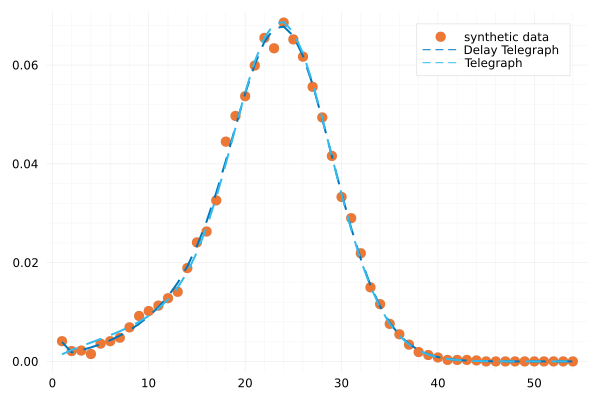

In [9]:
scatter(distributions[:,2],labels="synthetic data")
plot!([distributions[:,1] distributions_tele[:,1]],lines=(2, :dash),labels=["Delay Telegraph" "Telegraph"])

In [10]:
#Compare the paramters
DataFrame(True = params[1:3],Delay=estimated_params[1:3],Telegraph= estimated_params_tele[1:3])

,True,Delay,Telegraph
,Float64,Float64,Float64
1,1.0526,0.917393,0.410663
2,8.2034,7.54912,3.26949
3,57.989,57.539,57.703
